In [50]:
!pip install networkx penman levenshtein

from tripsbleu import load, compare, score
import networkx as nx
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.5/230.5 kB 3.2 MB/s eta 0:00:005.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 1.9 MB/s eta 0:00:00


In [18]:
amr_data = {i: load.load_amr_file(f"./amr{i}.txt")[0] for i in range(1,4)}

In [24]:
G = amr_data[1]

amr1


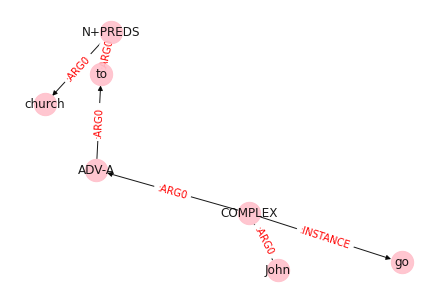

amr2


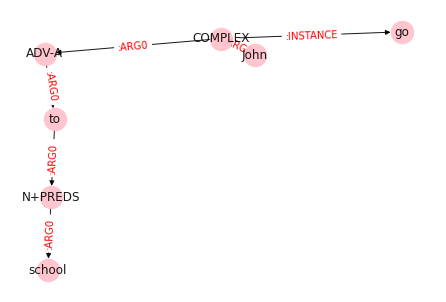

amr3


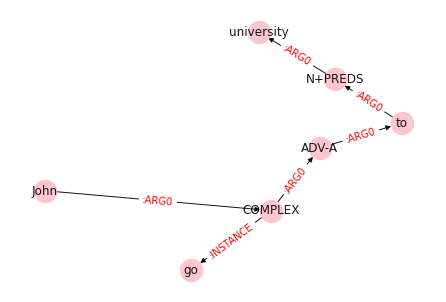

In [45]:
def draw_amr(G):    
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(
        G, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: G.nodes[node]["id"] for node in G.nodes()}
    )
    edge_labels = nx.get_edge_attributes(G,'label') # key is edge, pls check for your case
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels,
        font_color='red'
    )
    plt.axis('off')
    plt.show()

for a in amr_data:
    print(f"amr{a}")
    draw_amr(amr_data[a])

In [97]:
comparison = compare.greedy(min_trips_wup, align=False)

In [98]:
score.sembleu(reference=amr_data[2], candidate=amr_data[3], pk=comparison, node_label="id", edge_label="role")

0.6199618457910536

In [99]:
score.sembleu(reference=amr_data[1], candidate=amr_data[3], pk=comparison, node_label="id", edge_label="role")

0.5879426958694103

In [100]:
score.sembleu(reference=amr_data[1], candidate=amr_data[2], pk=comparison, node_label="id", edge_label="role")

0.5879426958694103

```
(V1 / John
	:ARG0
		(V2 / COMPLEX
			:INSTANCE
				(V3 / go)
			:ARG0
				(V4 / ADV-A
					:ARG0
						(V5 / to
							:ARG0
								(V6 / N+PREDS
									:ARG0
										(V7 / church))))))
```

In [96]:
from pytrips.ontology import get_ontology as ont

def min_trips_wup(a, b):
    elt1 = ont()[f"w::{a[0]}"]
    elt2 = ont()[f"w::{b[0]}"]
    if (not elt1) or (not elt2):
        return compare.kronecker(a, b)
    values = []
    for _a in elt1:
        for _b in elt2:
            values.append(_a.wup(_b))
    return min(values)